In [1]:
import docx
import astropy.units as units
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
%load_ext autoreload

In [2]:
%config InlineBackend.figure_format = 'retina'
from astropy.visualization import quantity_support
quantity_support() 

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fa33789f950>

In [3]:
%autoreload 2
import pyfcctab

In [4]:
path = "/users/livesey/corf/"
tables = pyfcctab.read(filename='/users/livesey/Desktop/fcctable.docx',
                  skip_additionals=False)
pyfcctab.save(tables)
# tables = pyfcctab.load(path+"fcctables.pickle")

Reading tables: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, done.
Digesting: R1, R2, R3, F, NF, done.
Injecting additions in: R1, R2, R3, F, NF, done.
Merging: ITU, USA, done.


In [5]:
bands = tables.r1.get_bands(22.4*units.GHz, adjacent=True)
for b in bands:
    print ('-------------')
    print(b)

-------------
22.0 GHz-22.21 GHz [R1]
FIXED
MOBILE EXCEPT AERONAUTICAL MOBILE
5.149
-------------
22.01 GHz-22.21 GHz [R1]
Radio astronomy 5.149#

-------------
22.21 GHz-22.5 GHz [R1]
EARTH EXPLORATION-SATELLITE (passive)
FIXED
MOBILE EXCEPT AERONAUTICAL MOBILE
RADIO ASTRONOMY
SPACE RESEARCH (passive)
5.149 5.532
-------------
22.21 GHz-22.5 GHz [R1]
Radio astronomy 5.149#

-------------
22.5 GHz-22.55 GHz [R1]
FIXED
MOBILE



TypeError: __init__() got multiple values for argument 'height'

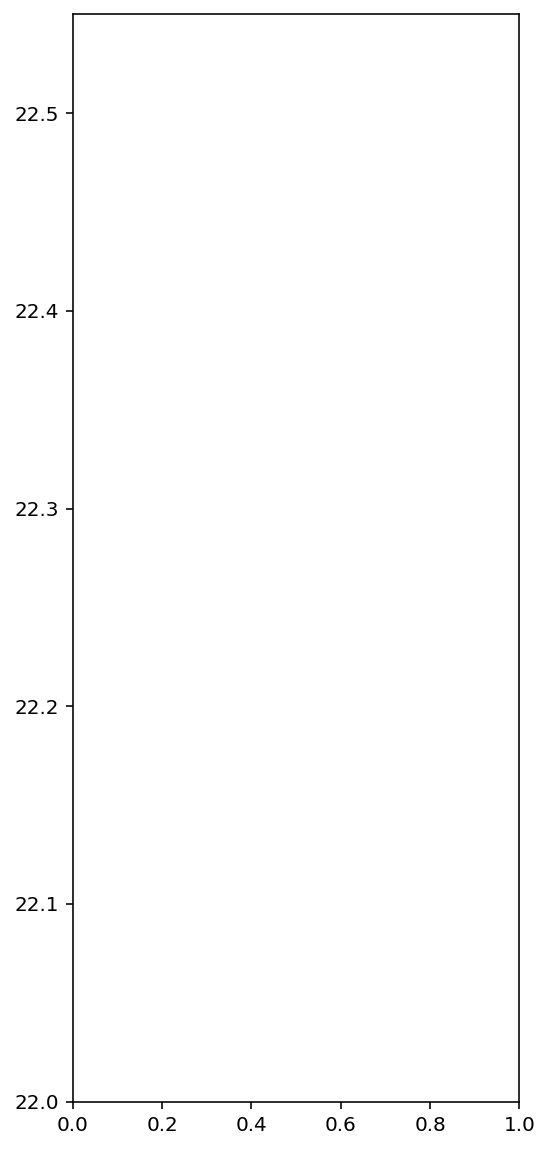

In [6]:
fig, axes=plt.subplots(figsize=(4.0,10.0))
fMin = min(f.bounds[0] for f in bands)
fMax = max(f.bounds[1] for f in bands)
axes.set_ylim(fMin, fMax)
for i, b in enumerate(bands):
    y = b.bounds[0]
    h = b.bounds[1]-b.bounds[0]
    axes.text(0, y, str(b), bbox={"edgecolor":"black", "height":h})
# help(axes.text)
plt.show()

In [ ]:
for b in tables.:
    if b.has_footnote("5.149") and not b.has_allocation("Radio astronomy*"):
        print ("---------------")
        print (b)

In [ ]:
for b in tables.find_bands("ITU", 24.55*units.GHz):
    print (b)

In [ ]:
jurisdiction = "R3"
merged_list=tables.collections[jurisdiction]
merged = iter(merged_list)
accumulator = None
continue_iteration = True
while continue_iteration: 
    try:
        band = next(merged)
        # print (band)
        if band.has_allocation("Fixed*", primary=None):
            end_accumulation = False
            if accumulator is None:
                accumulator = band
            else:
                accumulator += band
        else:
            end_accumulation = True
    except StopIteration:
        end_accumulation = True
        continue_iteration = False
    except ValueError:
        end_accumulation = True
    if end_accumulation and accumulator is not None:
        # OK, we've gotten a block of primary allocations to fixed
        unaffected = True
        relevant_list = tables.find_bands(jurisdiction, accumulator.bounds, adjacent=True)
        # relevant_list = merged_list
        for other_band in relevant_list:
            relevant = other_band.overlaps(accumulator) or other_band.is_adjacent(accumulator)
            relevant = relevant and (
                other_band.has_allocation("Radio astronomy*") or
                other_band.has_allocation("Earth Exploration-Satellite*"))
            if relevant:
                if unaffected:
                    print ()
                    print (f"The fixed allocations in the bands covering {accumulator.range_str()}" +
                          f" {accumulator.jurisdictions_str()} affect:")
                    #print (accumulator)
                unaffected = False
                print ("  " + other_band.compact_str(
                    skip_footnotes=False, 
                    skip_rules=True,
                    specific_allocations=["Earth exploration*", "Radio astronomy*"]))
        # if unaffected:
        #     print (f"============= No concern for the fixed allocations covering {accumulator.range_str()}" +
        #        f" {accumulator.jurisdictions_str()}")
        accumulator = None

In [ ]:
for fcc_band in tables.nf:
    if fcc_band.has_footnote("US246"):
        print ()
        print (f"================================ US246 band {fcc_band.range_str()}")
        print (fcc_band)
        safe = True
        for itu_band in tables.itu:
            if itu_band.overlaps(fcc_band) and not itu_band.has_footnote("5.340"):
                safe = False
                print (f"----- Overlapping ITU band {itu_band.range_str()}")
                print (itu_band)
                print ("Lacks footnote 5.340 protection")            
        if safe:
            print("All overlapping ITU bands have 5.340 protection")

In [ ]:
c=itu["R1"][0].deepcopy()
c.footnotes.append("Hello")
print(c.footnotes)

In [ ]:
x = units.Quantity(np.ndarray(shape=[10]), unit=units.Hz)

In [ ]:
x = np.arange(10).reshape([5,2])
i=np.array([0,2,3,1])
print (x[i,1])

In [ ]:
while True:
    try:
        a = 0
        raise ValueError("Test")
    except ValueError:
        break
    finally:
        print("OK")


In [ ]:
print(list(range(2,5)))